In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxPHSurvivalAnalysis 
from sksurv.nonparametric import kaplan_meier_estimator

import warnings
warnings.filterwarnings("ignore")

In [6]:
covid = pd.read_parquet('covidClean.parquet')

df = covid.copy()
df["DAYS"] = (df["DEATH_DATE"] - df["SYMPTOMS_DATE"]).dt.days
df = df.fillna(0)

toRemove = ["PATIENT_ID", "USMER", "SYMPTOMS_DATE",
            "MEDICAL_UNIT", "ADMISSION_DATE", "PATIENT_TYPE",
            "DEATH_DATE", "ORIGIN_COUNTRY", "AT_RISK"]
df = df.drop(columns = toRemove)
df = df[(df.DAYS >= 0) & (df.DAYS <= 60)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609846 entries, 15 to 4075326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEX             609846 non-null  bool   
 1   INTUBED         609846 non-null  bool   
 2   PNEUMONIA       609846 non-null  bool   
 3   AGE             609846 non-null  int64  
 4   PREGNANT        609846 non-null  bool   
 5   DIABETES        609846 non-null  bool   
 6   COPD            609846 non-null  bool   
 7   ASTHMA          609846 non-null  bool   
 8   INMUSUPR        609846 non-null  bool   
 9   HYPERTENSION    609846 non-null  bool   
 10  OTHER_DISEASE   609846 non-null  bool   
 11  CARDIOVASCULAR  609846 non-null  bool   
 12  OBESITY         609846 non-null  bool   
 13  RENAL_CHRONIC   609846 non-null  bool   
 14  TOBACCO         609846 non-null  bool   
 15  ICU             609846 non-null  bool   
 16  DIED            609846 non-null  bool   
 17  DAYS    

<Axes: ylabel='Density'>

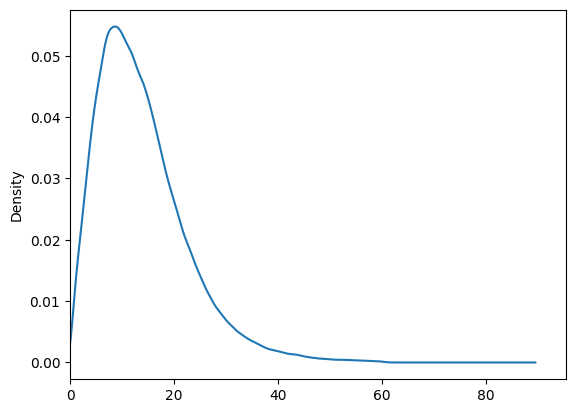

In [7]:
df.DAYS[df.DAYS != 0].plot(kind="kde", xlim=(0))

In [8]:
def printGraph(colname, legend = ["NO", "YES"]):
    for elem in set(df[colname]):
        indexis = df[df[colname] == elem]
        time, survival_prob = kaplan_meier_estimator(indexis["DIED"], indexis["DAYS"])
        
        plt.title(colname)
        plt.step(time, survival_prob, where="post")
        plt.ylabel("est. probability of survival $\hat{S}(t)$")
        plt.xlabel("time $t$")
        plt.legend(legend)

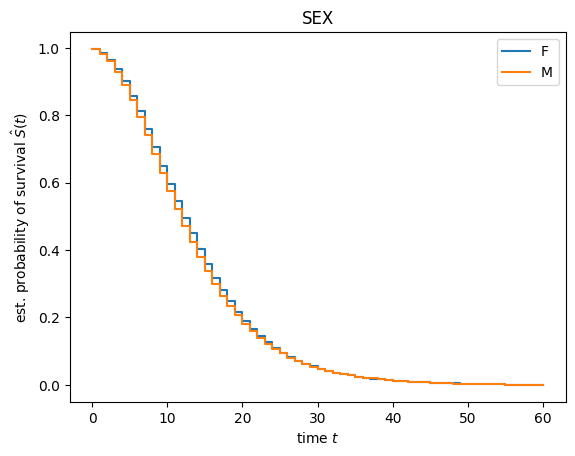

In [9]:
printGraph("SEX", ["F", "M"])

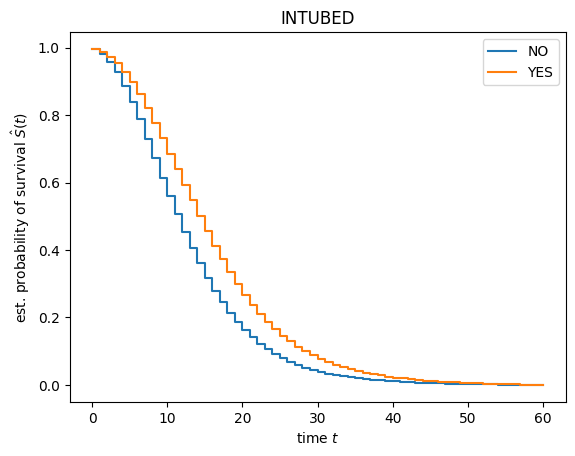

In [10]:
printGraph("INTUBED")

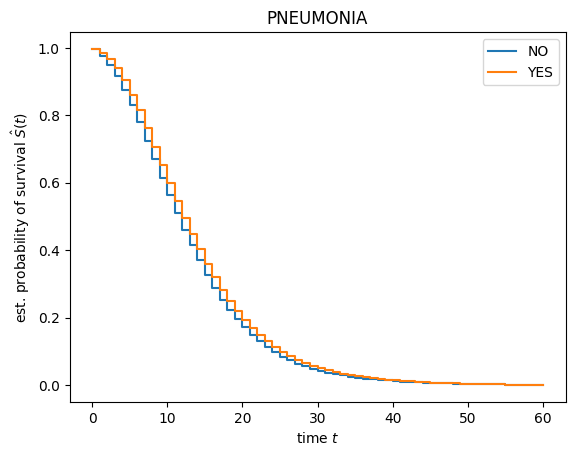

In [11]:
printGraph("PNEUMONIA")

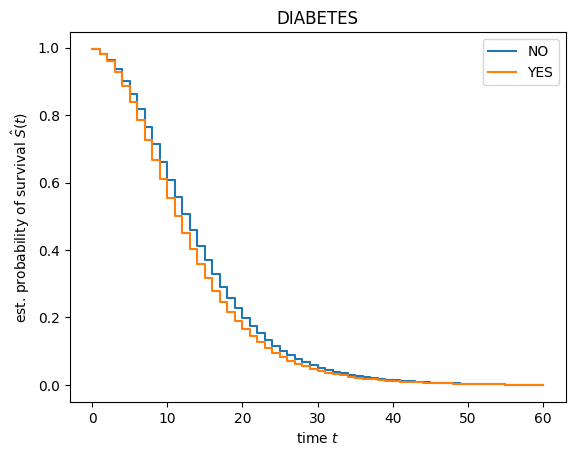

In [12]:
printGraph("DIABETES")

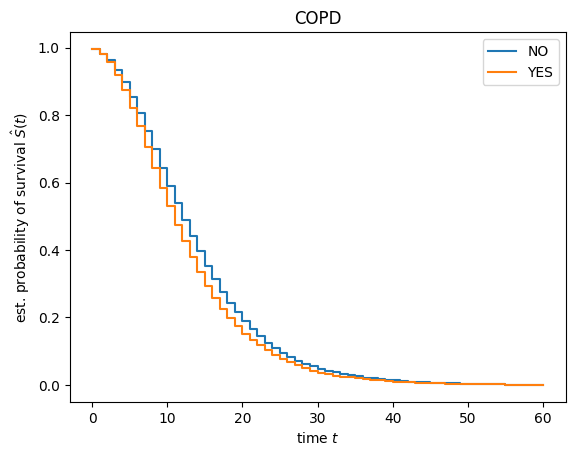

In [13]:
printGraph("COPD")

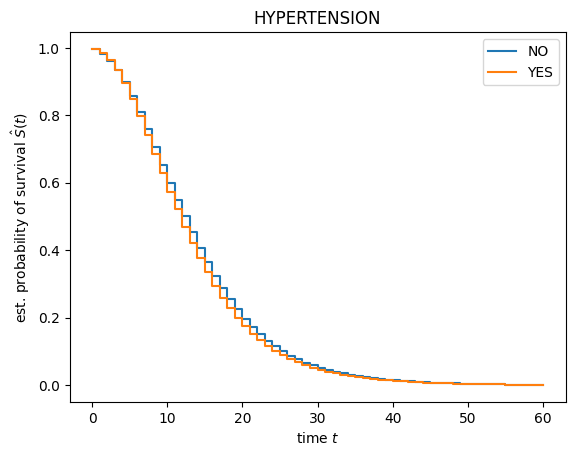

In [14]:
printGraph("HYPERTENSION")

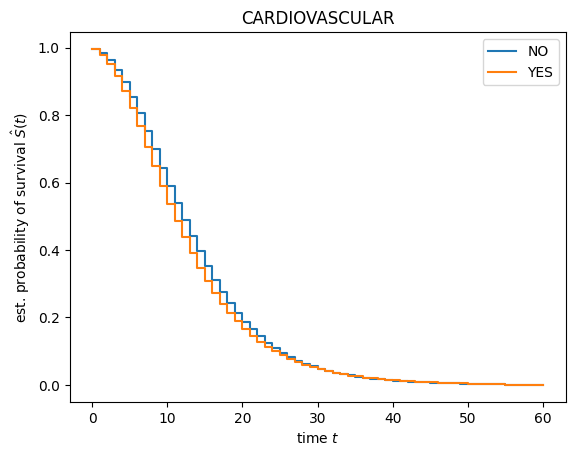

In [15]:
printGraph("CARDIOVASCULAR")

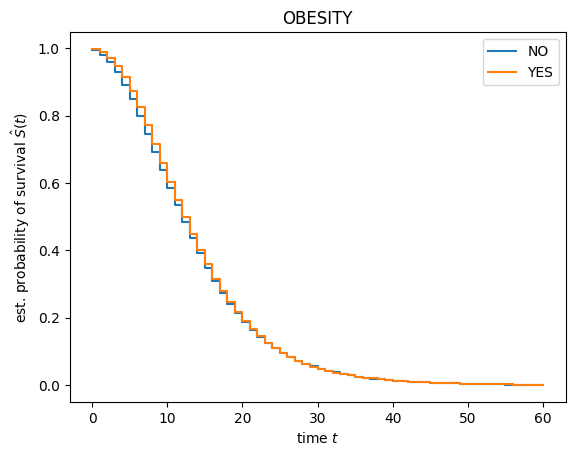

In [16]:
printGraph("OBESITY")

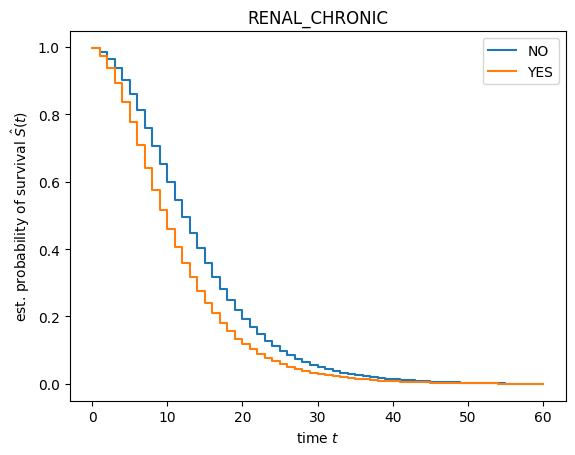

In [17]:
printGraph("RENAL_CHRONIC")

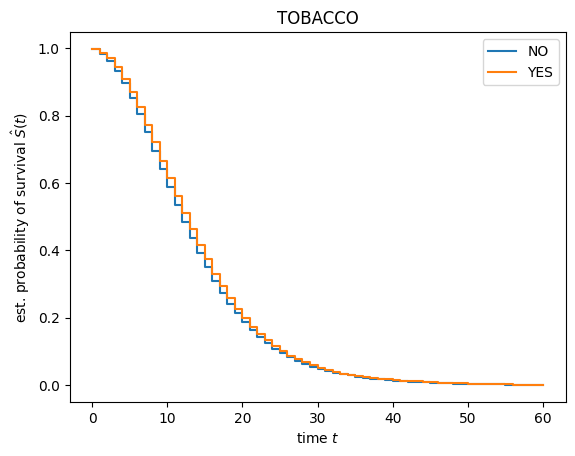

In [18]:
printGraph("TOBACCO")

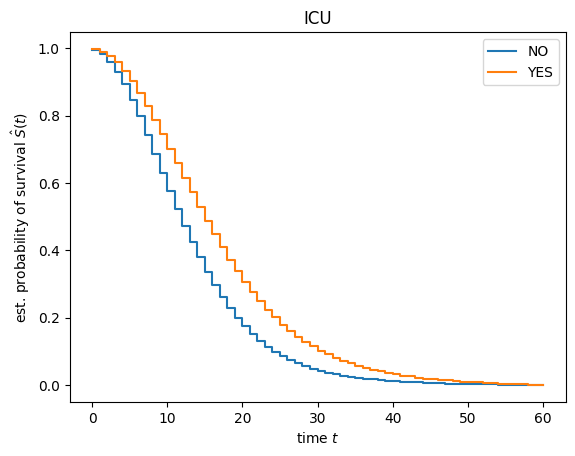

In [19]:
printGraph("ICU")

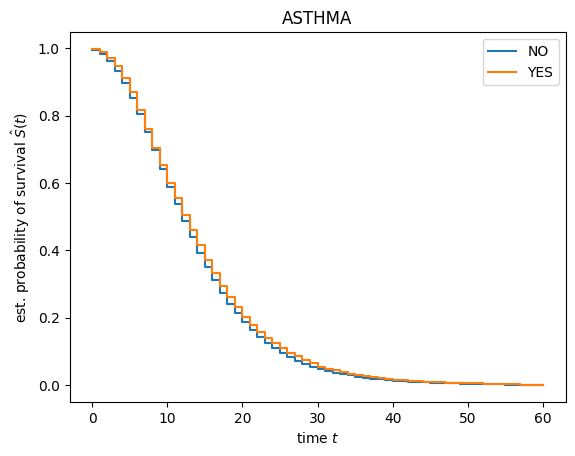

In [20]:
printGraph("ASTHMA")

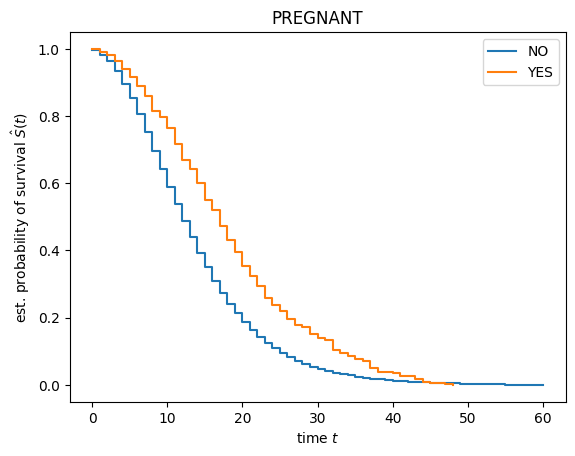

In [21]:
printGraph("PREGNANT")

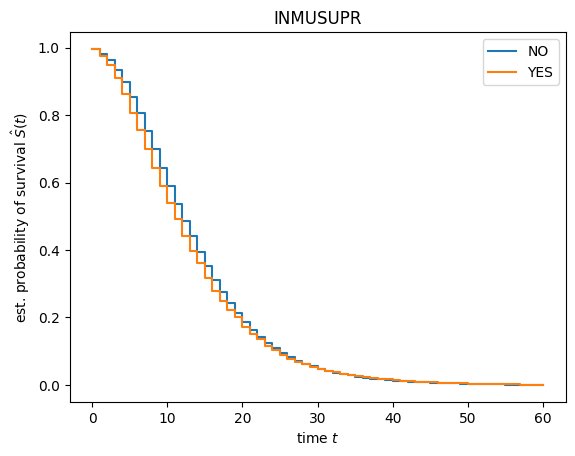

In [22]:
printGraph("INMUSUPR")